In [3]:
import pandas as pd

In [ ]:
import pandas as pd

# List of file paths for the time series dataset
file_paths = [
    r"D:\Hackthons\UIDAI\api_data_aadhar_enrolment\api_data_aadhar_enrolment_0_500000.csv",
    r"D:\Hackthons\UIDAI\api_data_aadhar_enrolment\api_data_aadhar_enrolment_500000_1000000.csv",
    r"D:\Hackthons\UIDAI\api_data_aadhar_enrolment\api_data_aadhar_enrolment_1000000_1006029.csv"
]

# Load each file into a list of DataFrames
dfs = []
for path in file_paths:
    df = pd.read_csv(path)
    dfs.append(df)
    print(f"Loaded {path} with shape {df.shape}")

# Optionally, concatenate them into one DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
print(f"Combined DataFrame shape: {combined_df.shape}")

Loaded D:\Hackthons\UIDAI\api_data_aadhar_enrolment\api_data_aadhar_enrolment_0_500000.csv with shape (500000, 7)
Loaded D:\Hackthons\UIDAI\api_data_aadhar_enrolment\api_data_aadhar_enrolment_500000_1000000.csv with shape (500000, 7)
Loaded D:\Hackthons\UIDAI\api_data_aadhar_enrolment\api_data_aadhar_enrolment_1000000_1006029.csv with shape (6029, 7)
Combined DataFrame shape: (1006029, 7)


In [ ]:
# Save the combined DataFrame to a CSV file
combined_df.to_csv(r"D:\Hackthons\UIDAI\api_data_aadhar_enrolment\merged.csv", index=False)
print('Combined data saved to merged.csv')


In [ ]:
df.shape

(6029, 7)

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(6029, 7)

In [ ]:
# Print the total number of unique states and districts
print("Total unique states:", combined_df['state'].nunique())
print("Total unique districts:", combined_df['district'].nunique())

Total unique states: 55
Total unique districts: 985


In [4]:
df = pd.read_csv(r"D:\Hackthons\UIDAI\api_data_aadhar_enrolment\merged_final.csv")
print("Total unique states:", df['state'].nunique())
print("Total unique districts:", df['district'].nunique())

Total unique states: 36
Total unique districts: 791


### Data Cleaning

In [ ]:
state_map = {
    "Andaman & Nicobar Islands": "Andaman and Nicobar Islands",
    "Andaman And Nicobar Islands": "Andaman and Nicobar Islands",
    "Andhra Pradesh": "Andhra Pradesh",
    "Arunachal Pradesh": "Arunachal Pradesh",
    "Assam": "Assam",
    "Bihar": "Bihar",
    "Dadra & Nagar Haveli": "Dadra and Nagar Haveli and Daman and Diu",
    "Dadra And Nagar Haveli": "Dadra and Nagar Haveli and Daman and Diu",
    "Daman & Diu": "Dadra and Nagar Haveli and Daman and Diu",
    "Daman And Diu": "Dadra and Nagar Haveli and Daman and Diu",
    "Dadra And Nagar Haveli And Daman And Diu": "Dadra and Nagar Haveli and Daman and Diu",
    "The Dadra And Nagar Haveli And Daman And Diu": "Dadra and Nagar Haveli and Daman and Diu",
    "Delhi": "Delhi",
    "Goa": "Goa",
    "Gujarat": "Gujarat",
    "Haryana": "Haryana",
    "Himachal Pradesh": "Himachal Pradesh",
    "Jammu & Kashmir": "Jammu and Kashmir",
    "Jammu And Kashmir": "Jammu and Kashmir",
    "Jharkhand": "Jharkhand",
    "Karnataka": "Karnataka",
    "Kerala": "Kerala",
    "Ladakh": "Ladakh",
    "Lakshadweep": "Lakshadweep",
    "Madhya Pradesh": "Madhya Pradesh",
    "Maharashtra": "Maharashtra",
    "Manipur": "Manipur",
    "Meghalaya": "Meghalaya",
    "Mizoram": "Mizoram",
    "Nagaland": "Nagaland",
    "Orissa": "Odisha",
    "Odisha": "Odisha",
    "ODISHA": "Odisha",
    "Pondicherry": "Puducherry",
    "Puducherry": "Puducherry",
    "Punjab": "Punjab",
    "Rajasthan": "Rajasthan",
    "Sikkim": "Sikkim",
    "Tamil Nadu": "Tamil Nadu",
    "Telangana": "Telangana",
    "Tripura": "Tripura",
    "Uttar Pradesh": "Uttar Pradesh",
    "Uttarakhand": "Uttarakhand",
    "West  Bengal": "West Bengal",
    "West Bangal": "West Bengal",
    "Westbengal": "West Bengal",
    "West bengal": "West Bengal",
    "West Bengal": "West Bengal",
    "WESTBENGAL": "West Bengal",
    "WEST BENGAL": "West Bengal",
    "Chandigarh": "Chandigarh",
    "Chhattisgarh": "Chhattisgarh",
"Dadra and Nagar Haveli": "Dadra and Nagar Haveli and Daman and Diu",
"Daman and Diu": "Dadra and Nagar Haveli and Daman and Diu",
}

district_map = {
    "Andaman and Nicobar Islands": {
        "Nicobars": "Nicobar",
    },

    "Andhra Pradesh": {
        "Anantapur": "Ananthapuramu",        # canonical is Ananthapuramu - commented out as rename
        "Ananthapur": "Ananthapuramu", 
        "Ananthapuramu": "Ananthapuramu", 
        # "Cuddapah": "Y.S.R. (Kadapa)",      # Cuddapah is old name for YSR district - commented out
        "Spsr Nellore": "Sri Potti Sriramulu Nellore",
        "Nellore":"Sri Potti Sriramulu Nellore", 
        "Sri Potti Sriramulu Nellore": "Sri Potti Sriramulu Nellore",
        "Visakhapatanam": "Visakhapatnam", 
        "Visakhapatnam": "Visakhapatnam", 
        # "Y. S. R": "Y.S.R. (Kadapa)" - commented out
    },
    "Telangana": {       
        "Jagitial": "Jagtial",            # fix spelling
        "Jangoan": "Jangaon", # spelling        
        "Karim Nagar": "Karimnagar", # spelling
        "K.V. Rangareddy": "Rangareddy",       
        "Mahabub Nagar": "Mahabubnagar", # spelling
        "Mahbubnagar": "Mahabubnagar", # spelling
        "Medchal Malkajgiri": "Medchal-Malkajgiri", 
        "Medchal?Malkajgiri": "Medchal-Malkajgiri", 
        "Medchal-Malkajgiri": "Medchal-Malkajgiri", 
        "Medchal−Malkajgiri": "Medchal-Malkajgiri", 
        "Medchalâˆ’Malkajgiri": "Medchal-Malkajgiri", 
        "Ranga Reddy": "Rangareddy",
        "Rangareddy": "Rangareddy", 
        "Warangal (Urban)": "Warangal Urban",
        "K.v. Rangareddy": "Rangareddy",
       
    },
    "Assam": {
        "Sibsagar": "Sivasagar", 
    },
    "Bihar": {
        "Aurangabad": "Aurangabad(BH)",
        # "Kaimur (Bhabua)": "Bhabua", - commented
        "Purba Champaran": "Purbi Champaran",
        "Purnea": "Purnia",
        # "Monghyr": "Munger", 
        "Samstipur":"Samastipur", # spelling
        "Sheikpura":"Sheikhpura", # spelling
        "West Champaran": "Paschim Champaran"
    },
    # Chandigarh removed as no mappings
    "Chhattisgarh": {
        "Manendragarhâ€“Chirmiriâ€“Bharatpur": "Manendragarh-Chirmiri-Bharatpur", # spelling
        "Mohalla-Manpur-Ambagarh Chowki":"Mohla-Manpur-Ambagarh Chouki", # spelling
        "Janjgir - Champa": "Janjgir-Champa", # spelling
        "Janjgir Champa": "Janjgir-Champa", # spelling
        # "Janjgir-Champa": "Janjgir-Champa", - same
        "Gaurella Pendra Marwahi":"Gaurela-Pendra-Marwahi", # spelling
    },
    "Dadra and Nagar Haveli and Daman and Diu": {
        "Dadra And Nagar Haveli": "Dadra And Nagar Haveli", # spelling
        "Dadra & Nagar Haveli": "Dadra And Nagar Haveli", # spelling
        # "Daman & Diu": "Daman",  # ambiguous cases, pick primary - commented out
        # "Daman And Diu": "Daman",  # similarly - commented
    },
    "Delhi": {
        "North East": "North East Delhi",
        "North East   *": "North East Delhi", # spelling/cleanup
       
    },
    "Gujarat": {
        "Ahmadabad": "Ahmedabad", # spelling
        "Banas Kantha": "Banaskantha", # spelling
        "Dohad": "Dahod", # spelling
        "Panch Mahals": "Panch Mahals", # spelling
        "Panchmahals": "Panch Mahals", # spelling
        "Sabar Kantha": "Sabarkantha", # spelling
        "Surendra Nagar": "Surendranagar", # spelling
    },
    "Haryana": {
    "Gurgaon": "Gurugram", # rename
    "Jhajjar *": "Jhajjar", # cleanup
    "Mewat": "Nuh",
    "Yamuna Nagar": "Yamunanagar", # spelling
},
"Himachal Pradesh": {
    "Lahul & Spiti": "Lahaul and Spiti", # spelling
    "Lahul And Spiti": "Lahaul and Spiti", # spelling
},
"Jammu and Kashmir": {
    "Badgam": "Budgam", # spelling
    "Bandipur": "Bandipore", # spelling
    "Rajauri": "Rajouri", # spelling
    "Shupiyan": "Shopian", # spelling
    # "Leh (Ladakh)": "Leh",  # Drop "(Ladakh)", treat as Leh - commented out
},
"Jharkhand": {
    "Bokaro *": "Bokaro", # cleanup
    "East Singhbum": "East Singhbhum", # spelling
    "Garhwa *": "Garhwa", # cleanup
    "Hazaribag": "Hazaribagh", # spelling
    "Kodarma": "Koderma", # spelling
    "Pakaur": "Pakur", # spelling
    "Palamu": "Palamau", # spelling
    "Pashchimi Singhbhum": "West Singhbhum", # spelling
    "Purbi Singhbhum": "East Singhbhum", # spelling
    "Sahibganj": "Sahebganj", # spelling
    # Keep already canonical ones (e.g., Ranchi, Jamtara, etc.)
},
"Karnataka": {
    "Bagalkot *": "Bagalkot", # cleanup
    "Bangalore": "Bengaluru Urban", # rename
    "Bangalore Rural": "Bengaluru Rural", # rename
    "Belgaum": "Belagavi", # rename
    "Bellary": "Ballari", # rename
    "Bijapur": "Vijayapura", # rename
    "Bijapur(Kar)": "Vijayapura", # rename
    "Chamrajanagar": "Chamarajanagar", # spelling
    "Chamrajnagar": "Chamarajanagar", # spelling
    "Chickmagalur": "Chikkamagaluru", # spelling
    "Chikmagalur": "Chikkamagaluru", # spelling
    "Davangere": "Davanagere", # spelling
    "Gadag *": "Gadag", # cleanup
    "Gulbarga": "Kalaburagi", # rename
    "Hasan": "Hassan", # spelling
    "Haveri *": "Haveri", # cleanup
    "Mysore": "Mysuru", # rename
    "Ramanagar": "Ramanagara", # spelling
    "Shimoga": "Shivamogga", # rename
    "Tumkur": "Tumakuru", # rename
    "Udupi *": "Udupi", # cleanup
    # Retain already correct ones (e.g., Raichur, Koppal, etc.)
},
"Kerala": {
    "Kasargod": "Kasaragod", # spelling
    # All others are canonical
},
# Ladakh removed as same
"Madhya Pradesh": {
    "Ashok Nagar": "Ashoknagar", # spelling
    "Harda *": "Harda", # cleanup
    "Hoshangabad": "Narmadapuram",  # renamed - commented out
    "Narsimhapur": "Narsinghpur", # spelling
    "East Nimar": "Khandwa",        # East Nimar is another name for Khandwa - commented out
    "West Nimar": "Khargone",       # West Nimar is another name for Khargone - commented out
},
"Maharashtra": {
    "Ahmadnagar": "Ahmednagar", # spelling
    "Ahmed Nagar": "Ahmednagar", # spelling
    "Bid": "Beed", # spelling
    "Buldana": "Buldhana", # spelling
    "Chatrapati Sambhaji Nagar": "Chhatrapati Sambhajinagar", # spelling
    "Dharashiv": "Osmanabad",  # renamed officially - commented out
    "Gondia": "Gondiya", # spelling
    "Gondiya *": "Gondiya", # cleanup
    "Hingoli *": "Hingoli", # cleanup
    "Mumbai City": "Mumbai", # rename
    "Mumbai( Sub Urban )": "Mumbai Suburban", # spelling/cleanup
    "Nandurbar *": "Nandurbar", # cleanup
    "Raigarh": "Raigad", # spelling
    "Raigarh(Mh)": "Raigad", # spelling
    "Washim *": "Washim", # cleanup
    # remaining districts are already standardized
},

"Mizoram": {
    "Mamit": "Mamit", # same? Wait, "Mammit": "Mamit" is spelling
    "Mammit": "Mamit", # spelling
},
"Odisha": {
    # "Angul": "Angul", - same
    "Anugal": "Angul", # spelling
    "Anugul": "Angul", # spelling
    "Baleshwar": "Balasore", # spelling
    "Baleswar": "Balasore", # spelling
    # "Balasore": "Balasore", - same
    # "Bargarh": "Bargarh", - same
    "Baudh": "Boudh", # spelling
    "Jagatsinghapur": "Jagatsinghpur", # spelling
    "Jajapur": "Jajpur", # spelling
    "Kendrapara *": "Kendrapara", # cleanup
    "Kendujhar": "Keonjhar", # spelling
    "Khorda": "Khordha", # spelling
    "Nabarangapur": "Nabarangpur", # spelling
    "Sonapur": "Subarnapur", # spelling
    "Sundargarh": "Sundargarh", # spelling
    "Sundergarh": "Sundargarh", # spelling
},
"Puducherry": {
    "Pondicherry": "Puducherry",  # same city, old name - spelling
    # "Karaikal": "Karaikal", - same
    # "Yanam": "Yanam", - same
},
"Punjab": {
    "Ferozepur": "Firozpur",  # spelling variant
    "S.A.S Nagar(Mohali)": "S.A.S Nagar", # spelling
    "Sas Nagar (Mohali)": "S.A.S Nagar", # spelling
    "Sri Muktsar Sahib": "Sri Muktsar Sahib",  # standard spelling - same?
},
"Rajasthan": {
    "Chittaurgarh": "Chittorgarh", # spelling
    "Dhaulpur": "Dholpur", # spelling
    "DeegÂ ": "Deeg",  # remove encoding artifact - cleanup
    "Jhunjhunun": "Jhunjhunu", # spelling
    "Jalor": "Jalore", # spelling
    # The rest are either correct or represent distinct districts
},
"Sikkim": {
    "East": "East Sikkim", # rename
    # "East Sikkim": "East Sikkim", - same
    "North": "North Sikkim", # rename
    # "North Sikkim": "North Sikkim", - same
    "South": "South Sikkim", # rename
    # "South Sikkim": "South Sikkim", - same
    "West": "West Sikkim", # rename
    # "West Sikkim": "West Sikkim", - same
    # "Mangan": "Mangan",  # correct - same
    # "Namchi": "Namchi",  # correct - same
},
"Tripura": {
    "Dhalai  *": "Dhalai", # cleanup
    # All other entries are correctly spelled
},
"Uttar Pradesh": {
    "Bagpat": "Baghpat", # spelling
    "Bara Banki": "Barabanki", # spelling
    "Bulandshahar": "Bulandshahr", # spelling
    "Faizabad": "Ayodhya",  # Optional: legacy → new name, skip if you're avoiding such changes - commented
    "Jyotiba Phule Nagar": "Amroha",  # Optional - commented
    "Kushi Nagar": "Kushinagar", # spelling
    "Kushinagar *": "Kushinagar", # cleanup
    "Mahrajganj": "Maharajganj", # spelling
    "Rae Bareli": "Raebareli", # spelling
    "Sant Ravidas Nagar Bhadohi": "Sant Ravidas Nagar", # rename
    "Siddharth Nagar": "Siddharthnagar", # spelling
    "Shravasti": "Shrawasti", # spelling
},
"Uttarakhand": {
    "Hardwar": "Haridwar", # spelling
    # All other entries are correct
},
    "West Bengal": {
        "Hooghiy": "Hooghly", # spelling
        "Hugli": "Hooghly", # spelling
        "Hawrah": "Howrah", # spelling
        "Haora": "Howrah", # spelling
        "24 Paraganas North": "North 24 Parganas", # spelling
        "North Twenty Four Parganas": "North 24 Parganas", # spelling
        "24 Paraganas South": "South 24 Parganas", # spelling
        "South 24 Pargana": "South 24 Parganas", # spelling
        "South Twenty Four Parganas": "South 24 Parganas", # spelling
        "North Dinajpur": "Uttar Dinajpur", # rename
        # "Uttar Dinajpur": "Uttar Dinajpur", - same
        "Dinajpur Dakshin": "Dakshin Dinajpur", # spelling
        "Dinajpur Uttar": "Uttar Dinajpur", # spelling
        # "Hooghly": "Hooghly", - same
        # "Howrah": "Howrah", - same
        "Coochbehar": "Cooch Behar", # spelling
        "Koch Bihar": "Cooch Behar", # spelling
        "Medinipur": "Paschim Medinipur", # rename
        "West Medinipur": "Paschim Medinipur", # rename
        "East Midnapore": "Purba Medinipur", # rename
        "East Midnapur": "Purba Medinipur", # spelling
        "Medinipur West": "Paschim Medinipur", # rename
        "Barddhaman": "Purba Bardhaman", # spelling
        "Bardhaman": "Purba Bardhaman", # spelling
        "Burdwan": "Purba Bardhaman", # rename
        "Paschim Bardhaman": "Paschim Bardhaman", # same
        # "Purba Bardhaman": "Purba Bardhaman", - same
        "West Midnapore": "Paschim Medinipur", # rename
        "South Dinajpur": "Dakshin Dinajpur", # rename
        # "Darjeeling": "Darjeeling", - same
        "Darjiling": "Darjeeling", # spelling
        # "Jalpaiguri": "Jalpaiguri", - same
        # "Jhargram": "Jhargram", - same
        # "Kalimpong": "Kalimpong", - same
        # "Kolkata": "Kolkata", - same
        # "Malda": "Malda", - same
        "Maldah": "Malda", # spelling
        # "Purulia": "Purulia", - same
        "Puruliya": "Purulia", # spelling
        # "Murshidabad": "Murshidabad", - same
        # "Nadia": "Nadia" - same
    },


}


In [ ]:
# Apply state_map and district_map to the merged CSV
import pandas as pd

# Load the merged CSV
merged_path = r"D:\Hackthons\UIDAI\api_data_aadhar_enrolment\merged.csv"
df = pd.read_csv(merged_path)

# Correct erroneous state assignments based on geographical accuracy
df.loc[(df['state'] == 'Andhra Pradesh') & (df['district'].isin(['Khammam', 'Karimnagar', 'Nalgonda', 'Adilabad', 'Warangal', 'Medak', 'Karim Nagar', 'K.V. Rangareddy', 'K.V.Rangareddy', 'Rangareddi', 'Nizamabad', 'Hyderabad', 'Mahabubnagar', 'Mahbub Nagar', 'Mahbubnagar','Mahabub Nagar'])), 'state'] = 'Telangana'
df.loc[(df['state'] == 'Chandigarh') & (df['district'] == 'Rupnagar'), 'state'] = 'Punjab'
df.loc[(df['state'] == 'Jammu and Kashmir') & (df['district'].isin(['Leh (Ladakh)', 'Kargil', 'Leh'])), 'state'] = 'Ladakh'
df.loc[(df['state'] == 'Meghalaya') & (df['district'] == 'Kamrup'), 'state'] = 'Assam'

# Apply state mapping
df['state'] = df['state'].map(state_map).fillna(df['state'])

# Apply district mapping
def map_district(row):
    state = row['state']
    district = row['district']
    if state in district_map and district in district_map[state]:
        return district_map[state][district]
    return district

df['district'] = df.apply(map_district, axis=1)

# Convert date to datetime for proper sorting
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Sort by state, date, district (to have states in alphabetical order first)
df.sort_values(by=['state', 'date', 'district'], inplace=True)

# Convert date back to string for CSV
df['date'] = df['date'].dt.strftime('%Y-%m-%d')

# Save back to CSV
final_path = r"D:\Hackthons\UIDAI\api_data_aadhar_enrolment\merged.csv"
df.to_csv(final_path, index=False)

print("Mappings applied, corrections made, and CSV saved as merged.csv successfully.")

KeyboardInterrupt: 

In [ ]:
# Disambiguate districts that appear in multiple states
import pandas as pd

# Load the final CSV
final_path = r"D:\Hackthons\UIDAI\api_data_aadhar_enrolment\merged.csv"
df = pd.read_csv(final_path)

# Define disambiguation mappings
disambiguation = {
    ('Chhattisgarh', 'Balrampur'): 'Balrampur (CG)',
    ('Uttar Pradesh', 'Balrampur'): 'Balrampur (UP)',
    ('Chhattisgarh', 'Bilaspur'): 'Bilaspur (CG)',
    ('Himachal Pradesh', 'Bilaspur'): 'Bilaspur (HP)',
    ('Himachal Pradesh', 'Hamirpur'): 'Hamirpur (HP)',
    ('Uttar Pradesh', 'Hamirpur'): 'Hamirpur (UP)',
    ('Rajasthan', 'Pratapgarh'): 'Pratapgarh (RJ)',
    ('Uttar Pradesh', 'Pratapgarh'): 'Pratapgarh (UP)',
}

# Apply disambiguation
for (state, district), new_district in disambiguation.items():
    df.loc[(df['state'] == state) & (df['district'] == district), 'district'] = new_district

# Save back to CSV
df.to_csv(final_path, index=False)

print("District disambiguation applied and saved to merged.csv.")

District disambiguation applied and saved to merged.csv.


In [ ]:
import pandas as pd
df = pd.read_csv(r"D:\Hackthons\UIDAI\api_data_aadhar_enrolment\merged.csv")
district_states = df.groupby('district')['state'].nunique()
duplicates = district_states[district_states > 1]
print('Districts in multiple states:')
for d in duplicates.index:
     print(f'{d}: {list(df[df["district"] == d]["state"].unique())}') 


Districts in multiple states:


In [ ]:
# Print the total number of unique states and districts
print("Total unique states:", df['state'].nunique())
print("Total unique districts:", df['district'].nunique())

Total unique states: 38
Total unique districts: 840


### PCA(Principal Component Analysis)

In [2]:
# PCA for Dimensionality Reduction
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the cleaned data
df_pca = pd.read_csv(r"D:\Hackthons\UIDAI\api_data_aadhar_enrolment\merged_final.csv")

# Select numerical columns (exclude 'date' if present)
numerical_cols = df_pca.select_dtypes(include=[np.number]).columns.tolist()
if 'date' in numerical_cols:
    numerical_cols.remove('date')

# Standardize the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca[numerical_cols])

# Apply PCA (choose number of components, e.g., 2 for visualization)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", np.sum(pca.explained_variance_ratio_))

# Optionally, add the PCs back to the original df or save
df_pca = df_pca.copy()
df_pca['PC1'] = pca_df['PC1']
df_pca['PC2'] = pca_df['PC2']

# Save the PCA-transformed data
df_pca.to_csv(r"D:\Hackthons\UIDAI\api_data_aadhar_enrolment\pca_data.csv", index=False)
print("PCA applied and data saved to pca_data.csv")

Explained variance ratio: [0.52261117 0.25063308]
Total explained variance: 0.7732442500378598
PCA applied and data saved to pca_data.csv


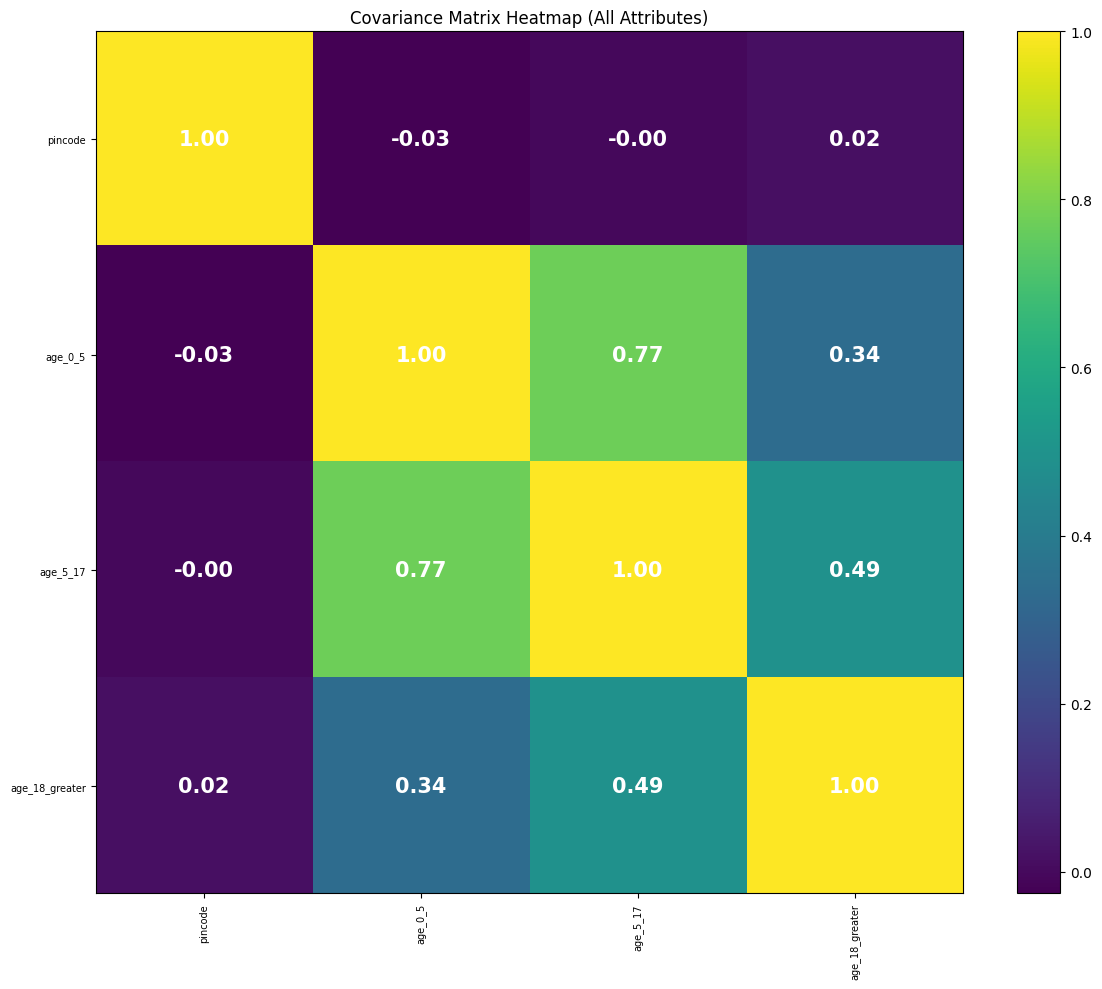

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Covariance matrix
cov_matrix = np.cov(scaled_data, rowvar=False)
cov_df = pd.DataFrame(cov_matrix, index=numerical_cols, columns=numerical_cols)

# Plot with all attributes
plt.figure(figsize=(max(12, len(numerical_cols)*0.4), max(10, len(numerical_cols)*0.4)))
plt.imshow(cov_df, aspect='auto', interpolation='nearest')
plt.colorbar()

# Annotate the values on the heatmap
for i in range(len(numerical_cols)):
    for j in range(len(numerical_cols)):
        value = cov_df.iloc[i, j]
        plt.text(j, i, f'{value:.2f}', ha='center', va='center', color='white', fontsize=15, fontweight='bold')

plt.title("Covariance Matrix Heatmap (All Attributes)")

plt.xticks(
    ticks=np.arange(len(numerical_cols)),
    labels=numerical_cols,
    rotation=90,
    fontsize=7
)
plt.yticks(
    ticks=np.arange(len(numerical_cols)),
    labels=numerical_cols,
    fontsize=7
)

plt.tight_layout()
plt.show()


In [68]:
print("------- Print dataset info before PCA -------")
print("Total rows:", df_pca.shape[0])
print("Total columns:", df_pca.shape[1])
print("Numerical columns used for PCA:", len(numerical_cols))
print(numerical_cols)

loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1_loading', 'PC2_loading'],
    index=numerical_cols
)

# Convert loadings to percentage contribution for each PC
pc1_percent = (loadings['PC1_loading'].abs() / loadings['PC1_loading'].abs().sum()) * 100
pc2_percent = (loadings['PC2_loading'].abs() / loadings['PC2_loading'].abs().sum()) * 100
print("\n\n------- Feature Contributions to Principal Components -------")
print("\nTop 10 Feature Contributions to PC1 (%):")
print(pc1_percent.sort_values(ascending=False).head(10).round(2))

print("\nTop 10 Feature Contributions to PC2 (%):")
print(pc2_percent.sort_values(ascending=False).head(10).round(2))

# Overall importance (PC1 + PC2)
loadings['overall_importance'] = np.sqrt(
    loadings['PC1_loading']**2 + loadings['PC2_loading']**2
)

# Convert overall importance into percentage
loadings['overall_importance_%'] = (
    loadings['overall_importance'] / loadings['overall_importance'].sum()
) * 100

print("\nTop 15 Important Features overall (PC1+PC2) in %:")
print(loadings['overall_importance_%'].sort_values(ascending=False).head(15).round(2))


------- Print dataset info before PCA -------
Total rows: 1006029
Total columns: 9
Numerical columns used for PCA: 4
['pincode', 'age_0_5', 'age_5_17', 'age_18_greater']


------- Feature Contributions to Principal Components -------

Top 10 Feature Contributions to PC1 (%):
age_5_17          37.16
age_0_5           34.84
age_18_greater    27.50
pincode            0.50
Name: PC1_loading, dtype: float64

Top 10 Feature Contributions to PC2 (%):
pincode           88.84
age_18_greater     6.95
age_0_5            4.20
age_5_17           0.00
Name: PC2_loading, dtype: float64

Top 15 Important Features overall (PC1+PC2) in %:
pincode           36.58
age_5_17          23.58
age_0_5           22.17
age_18_greater    17.68
Name: overall_importance_%, dtype: float64


In [69]:
print("\nSample PCA Output (first 10 rows):")
print(pca_df.head(10))



Sample PCA Output (first 10 rows):
        PC1       PC2
0  0.238036 -1.949381
1 -0.056923 -1.997766
2 -0.056923 -1.997766
3 -0.056923 -1.997766
4  0.090557 -1.973573
5  0.090557 -1.973573
6 -0.056923 -1.997766
7 -0.056923 -1.997766
8 -0.159728 -2.021960
9  0.238036 -1.949381


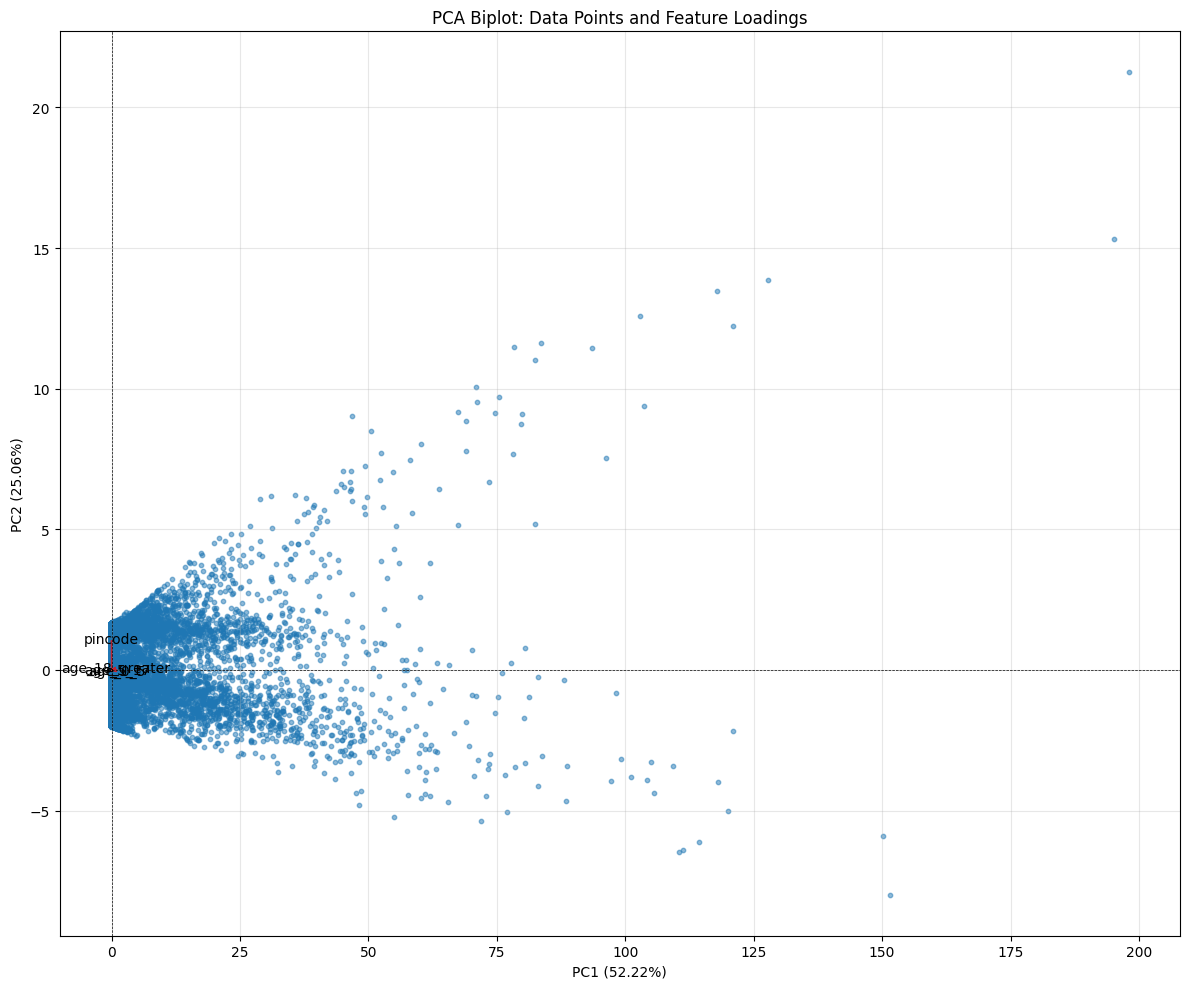

In [47]:
# PCA Biplot
import matplotlib.pyplot as plt

# Plot the biplot
fig, ax = plt.subplots(figsize=(12, 10))

# Scatter plot of the principal components
ax.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5, s=10)

# Plot arrows for feature loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
for i, feature in enumerate(numerical_cols):
    ax.arrow(0, 0, loadings[i, 0], loadings[i, 1], head_width=0.05, head_length=0.05, fc='red', ec='red', alpha=0.7)
    ax.text(loadings[i, 0] * 1.1, loadings[i, 1] * 1.1, feature, fontsize=10, ha='center', va='center')

# Labels and title
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
ax.set_title('PCA Biplot: Data Points and Feature Loadings')
ax.grid(True, alpha=0.3)
ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax.axvline(0, color='black', linewidth=0.5, linestyle='--')

plt.tight_layout()
plt.show()

### K-Means Clustering

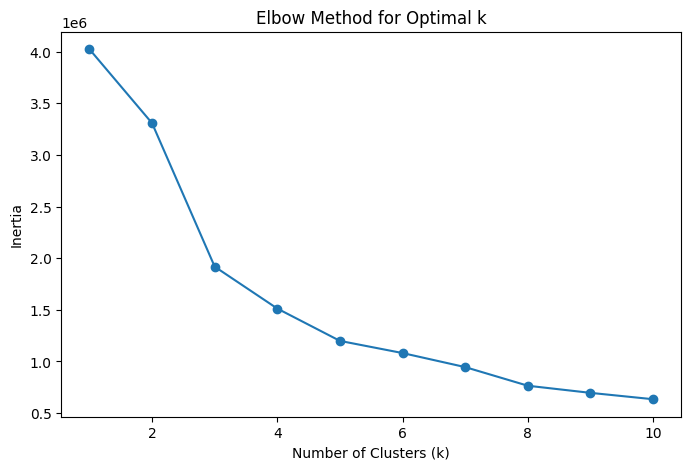

d:\Hackthons\UIDAI\Models\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


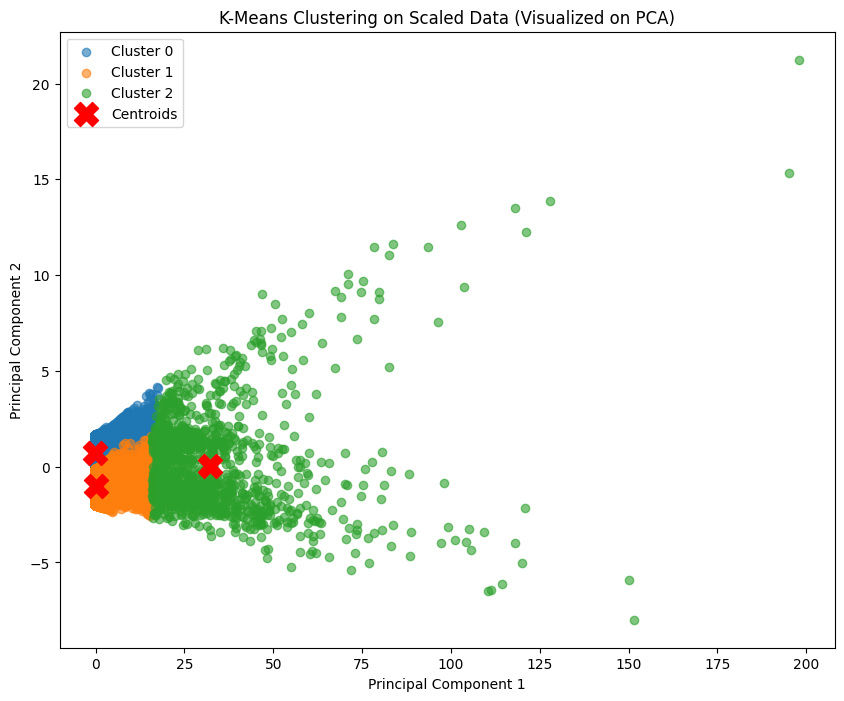

cluster
0    584945
1    419740
2      1344
Name: count, dtype: int64


In [73]:
# K-Means Clustering on Scaled Data with PCA Visualization

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Choose optimal k (e.g., k=3 based on elbow)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataframe
df['cluster'] = clusters

# Centroids in scaled space
centroids_scaled = kmeans.cluster_centers_

# Visualize clusters on PC1 and PC2 (using PCA for visualization)
plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):
    cluster_data = pca_df[clusters == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster}', alpha=0.6)

# Plot centroids (transformed to PCA space)
centroids_pca = pca.transform(centroids_scaled)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('K-Means Clustering on Scaled Data (Visualized on PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Display cluster counts
print(df['cluster'].value_counts())

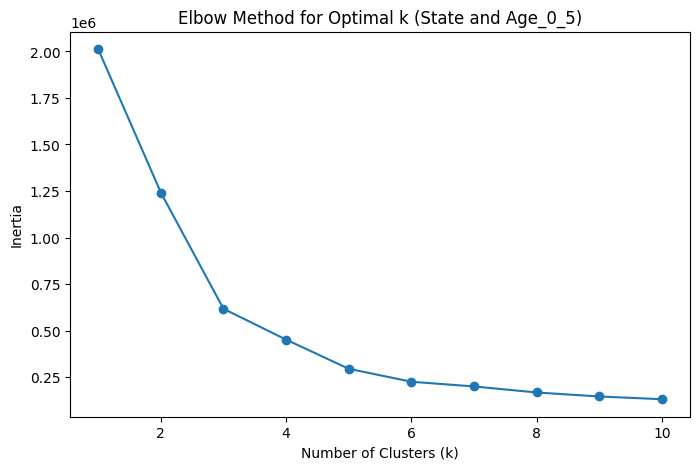

d:\Hackthons\UIDAI\Models\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


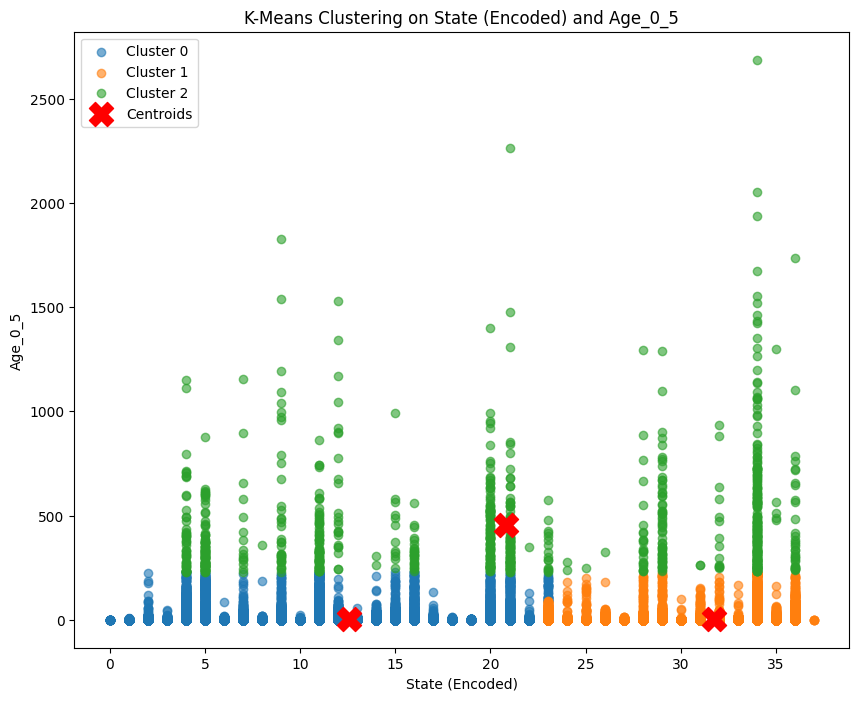

cluster
0    525962
1    479124
2       943
Name: count, dtype: int64
Centroid States: ['Haryana' 'Tamil Nadu' 'Madhya Pradesh']
Centroid Age_0_5: [  3.3365072    2.844702   455.06256628]


In [72]:
# K-Means Clustering on State and Age_0_5 (Raw Data)

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Select features: state (categorical) and age_0_5 (numerical)
features = df[['state', 'age_0_5']].copy()

# Encode state to numerical
le = LabelEncoder()
features['state_encoded'] = le.fit_transform(features['state'])

# Prepare data for clustering: state_encoded and age_0_5
X = features[['state_encoded', 'age_0_5']].values

# Scale the data
scaler_state = StandardScaler()
X_scaled = scaler_state.fit_transform(X)

# Determine optimal k using Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k (State and Age_0_5)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Choose optimal k (e.g., 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels
features['cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):
    cluster_data = features[features['cluster'] == cluster]
    plt.scatter(cluster_data['state_encoded'], cluster_data['age_0_5'], label=f'Cluster {cluster}', alpha=0.6)

# Plot centroids (inverse transform to original scale)
centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler_state.inverse_transform(centroids_scaled)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('K-Means Clustering on State (Encoded) and Age_0_5')
plt.xlabel('State (Encoded)')
plt.ylabel('Age_0_5')
plt.legend()
plt.show()

# Display cluster counts
print(features['cluster'].value_counts())

# Optional: Map back to state names for centroids
centroid_states = le.inverse_transform(centroids_original[:, 0].astype(int))
print("Centroid States:", centroid_states)
print("Centroid Age_0_5:", centroids_original[:, 1])

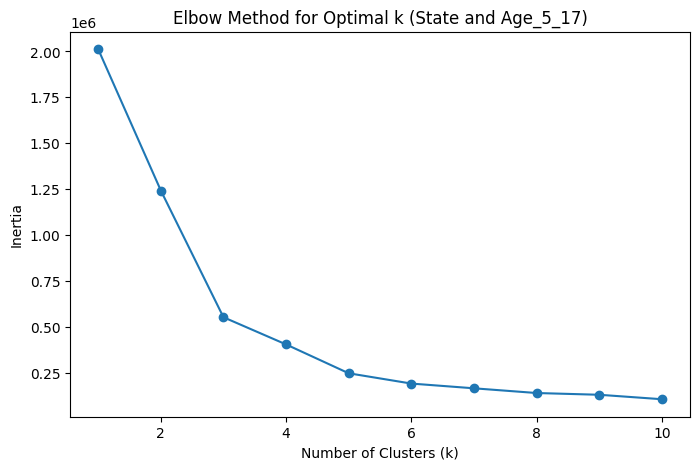

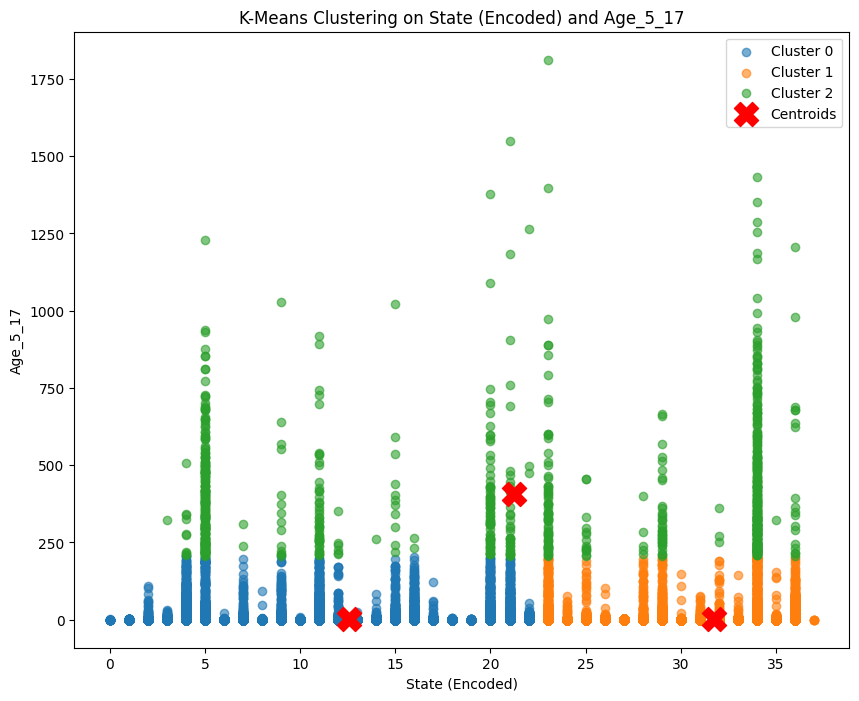

cluster
0    526068
1    479098
2       863
Name: count, dtype: int64
Centroid States: ['Haryana' 'Tamil Nadu' 'Maharashtra']
Centroid Age_5_17: [  1.32175878   1.4042555  408.19582851]


In [74]:
# K-Means Clustering on State and Age_5_17 (Raw Data)

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Select features: state (categorical) and age_5_17 (numerical)
features = df[['state', 'age_5_17']].copy()

# Encode state to numerical
le = LabelEncoder()
features['state_encoded'] = le.fit_transform(features['state'])

# Prepare data for clustering: state_encoded and age_5_17
X = features[['state_encoded', 'age_5_17']].values

# Scale the data
scaler_state = StandardScaler()
X_scaled = scaler_state.fit_transform(X)

# Determine optimal k using Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k (State and Age_5_17)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Choose optimal k (e.g., 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels
features['cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):
    cluster_data = features[features['cluster'] == cluster]
    plt.scatter(cluster_data['state_encoded'], cluster_data['age_5_17'], label=f'Cluster {cluster}', alpha=0.6)

# Plot centroids (inverse transform to original scale)
centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler_state.inverse_transform(centroids_scaled)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('K-Means Clustering on State (Encoded) and Age_5_17')
plt.xlabel('State (Encoded)')
plt.ylabel('Age_5_17')
plt.legend()
plt.show()

# Display cluster counts
print(features['cluster'].value_counts())

# Optional: Map back to state names for centroids
centroid_states = le.inverse_transform(centroids_original[:, 0].astype(int))
print("Centroid States:", centroid_states)
print("Centroid Age_5_17:", centroids_original[:, 1])

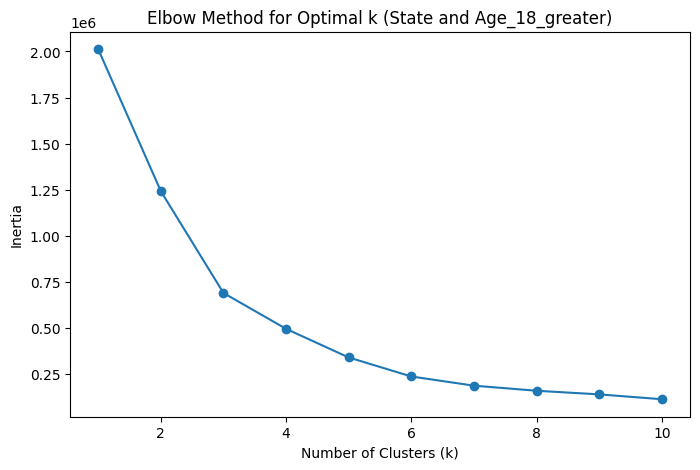

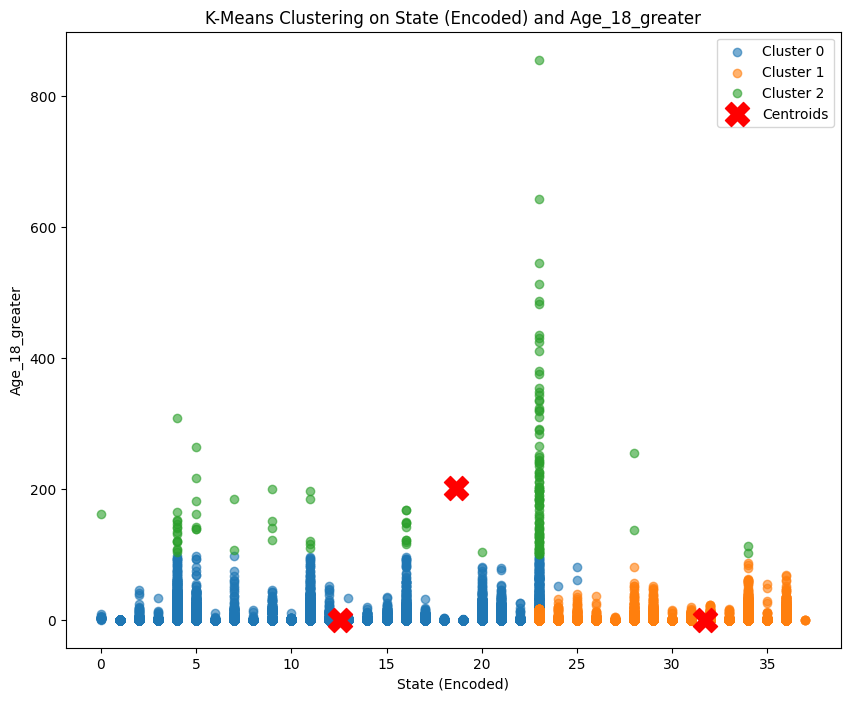

cluster
0    526625
1    479261
2       143
Name: count, dtype: int64
Centroid States: ['Haryana' 'Tamil Nadu' 'Ladakh']
Centroid Age_18_greater: [1.78933776e-01 9.48794081e-02 2.00349650e+02]


In [75]:
# K-Means Clustering on State and Age_18_greater (Raw Data)

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Select features: state (categorical) and age_18_greater (numerical)
features = df[['state', 'age_18_greater']].copy()

# Encode state to numerical
le = LabelEncoder()
features['state_encoded'] = le.fit_transform(features['state'])

# Prepare data for clustering: state_encoded and age_18_greater
X = features[['state_encoded', 'age_18_greater']].values

# Scale the data
scaler_state = StandardScaler()
X_scaled = scaler_state.fit_transform(X)

# Determine optimal k using Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k (State and Age_18_greater)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Choose optimal k (e.g., 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels
features['cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):
    cluster_data = features[features['cluster'] == cluster]
    plt.scatter(cluster_data['state_encoded'], cluster_data['age_18_greater'], label=f'Cluster {cluster}', alpha=0.6)

# Plot centroids (inverse transform to original scale)
centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler_state.inverse_transform(centroids_scaled)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('K-Means Clustering on State (Encoded) and Age_18_greater')
plt.xlabel('State (Encoded)')
plt.ylabel('Age_18_greater')
plt.legend()
plt.show()

# Display cluster counts
print(features['cluster'].value_counts())

# Optional: Map back to state names for centroids
centroid_states = le.inverse_transform(centroids_original[:, 0].astype(int))
print("Centroid States:", centroid_states)
print("Centroid Age_18_greater:", centroids_original[:, 1])

### Outliner

age_0_5: 102013 outliers detected (bounds: -2.00 to 6.00)


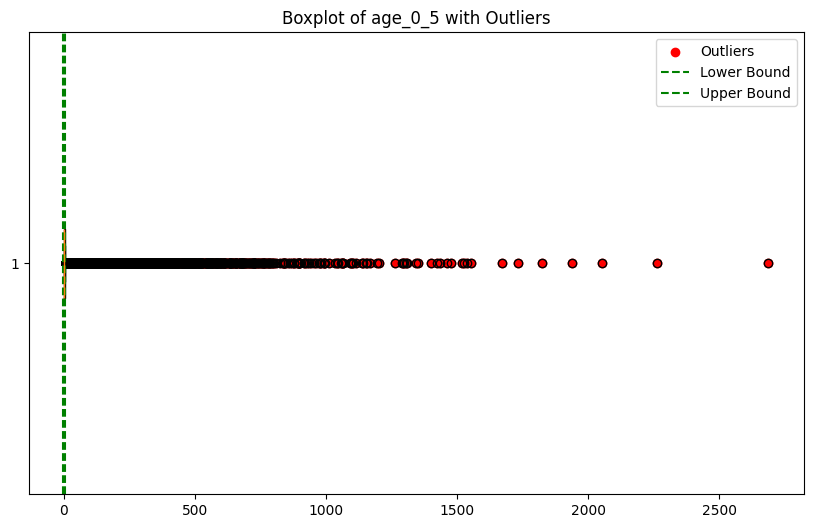

age_5_17: 135765 outliers detected (bounds: -1.50 to 2.50)


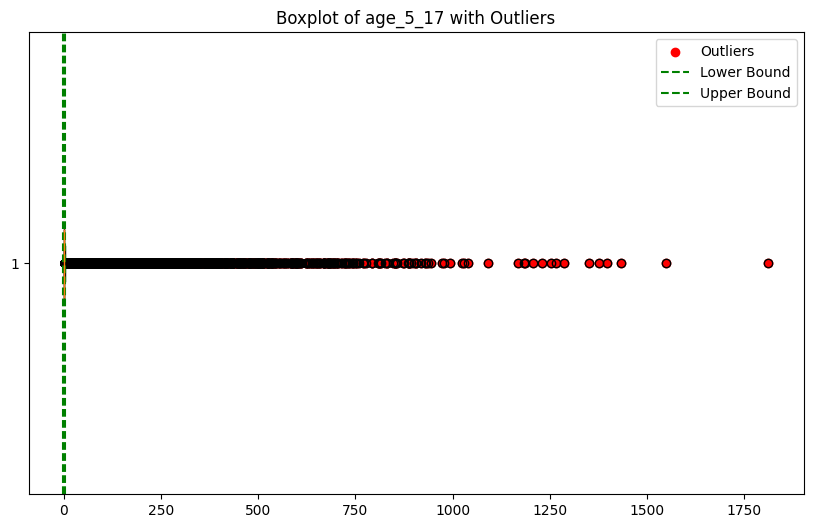

age_18_greater: 40225 outliers detected (bounds: 0.00 to 0.00)


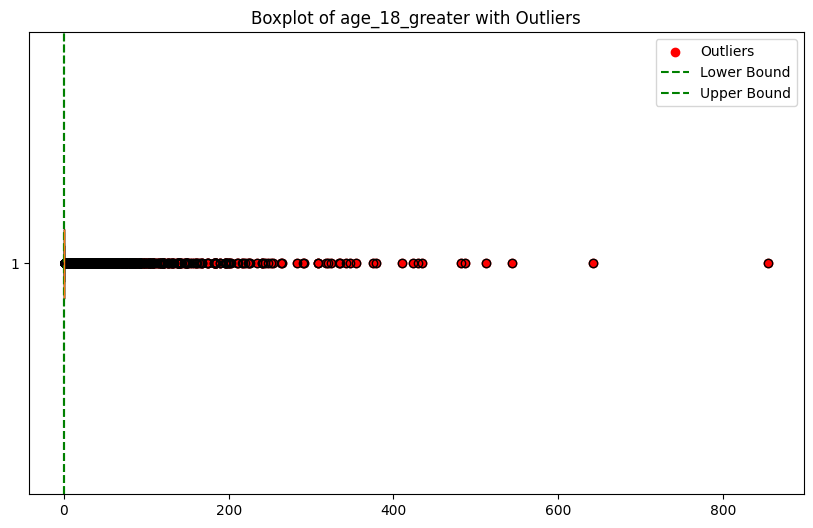

In [ ]:
# Outlier Detection for Age Group Columns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_age_outliers = pd.read_csv(r"D:\Hackthons\UIDAI\api_data_aadhar_enrolment\merged_final.csv")

# Define age group columns (adjust if column names differ)
age_groups = ['age_0_5', 'age_5_17', 'age_18_greater']

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect and visualize outliers for each age group
for col in age_groups:
    if col in df_age_outliers.columns:
        outliers, lb, ub = detect_outliers_iqr(df_age_outliers, col)
        print(f"{col}: {len(outliers)} outliers detected (bounds: {lb:.2f} to {ub:.2f})")

        # Boxplot for visualization
        plt.figure(figsize=(10, 6))
        plt.boxplot(df_age_outliers[col], vert=False)
        plt.scatter(outliers[col], [1] * len(outliers), color='red', label='Outliers')
        plt.axvline(lb, color='green', linestyle='--', label='Lower Bound')
        plt.axvline(ub, color='green', linestyle='--', label='Upper Bound')
        plt.title(f'Boxplot of {col} with Outliers')
        plt.legend()
        plt.show()
    else:
        print(f"Column {col} not found in the data.")

# Optionally, remove outliers for age groups (uncomment to apply)
# for col in age_groups:
#     if col in df_age_outliers.columns:
#         _, lb, ub = detect_outliers_iqr(df_age_outliers, col)
#         df_age_outliers = df_age_outliers[(df_age_outliers[col] >= lb) & (df_age_outliers[col] <= ub)]

# Save cleaned data (if outliers removed)
# df_age_outliers.to_csv(r"D:\Hackthons\UIDAI\api_data_aadhar_enrolment\cleaned_age_data.csv", index=False)
# print("Outliers removed from age groups and data saved.")

age_0_5: 3012 outliers detected using Z-score


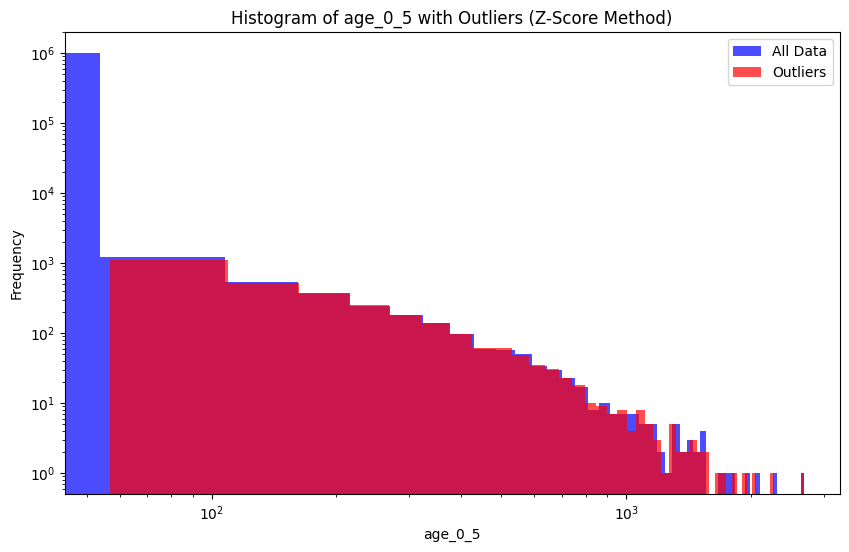

age_5_17: 2532 outliers detected using Z-score


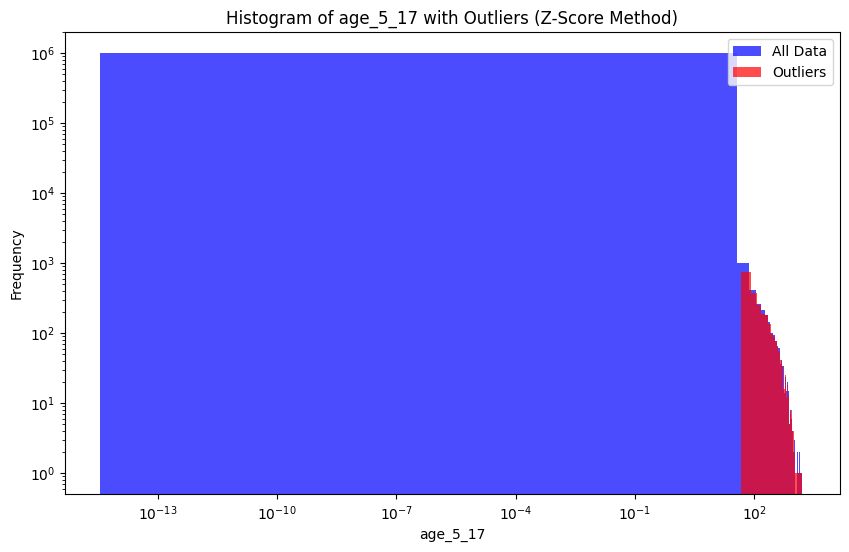

age_18_greater: 4036 outliers detected using Z-score


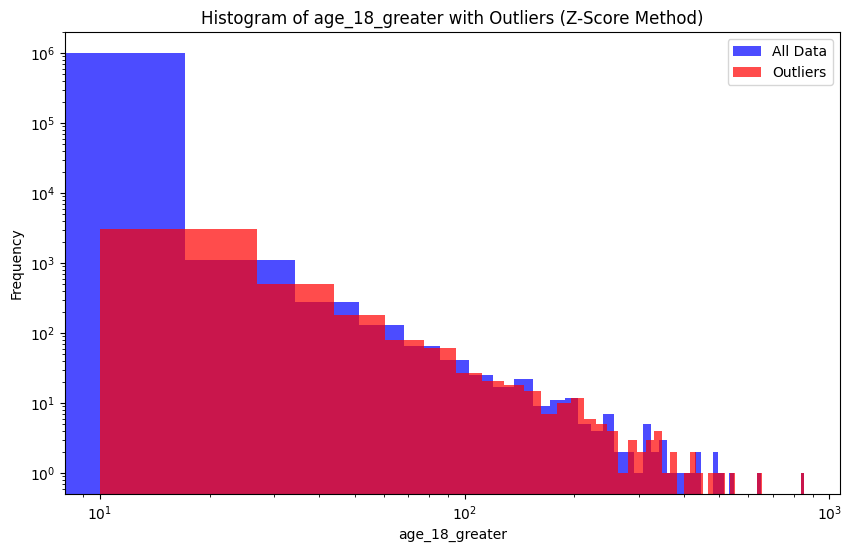

In [ ]:
# Outlier Detection using Z-Score Method

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load the data
df_zscore = pd.read_csv(r"D:\Hackthons\UIDAI\api_data_aadhar_enrolment\merged_final.csv")

# Define age group columns
age_groups = ['age_0_5', 'age_5_17', 'age_18_greater']

# Function to detect outliers using Z-score
def detect_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = data[z_scores > threshold]
    return outliers

# Detect and visualize outliers for each age group
for col in age_groups:
    if col in df_zscore.columns:
        outliers = detect_outliers_zscore(df_zscore, col)
        print(f"{col}: {len(outliers)} outliers detected using Z-score")

        # Histogram for visualization
        plt.figure(figsize=(10, 6))
        plt.hist(df_zscore[col], bins=50, alpha=0.7, color='blue', label='All Data')
        plt.hist(outliers[col], bins=50, alpha=0.7, color='red', label='Outliers')
        plt.title(f'Histogram of {col} with Outliers (Z-Score Method)')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xscale('log')
        plt.yscale('log')
        plt.legend()
        plt.show()
    else:
        print(f"Column {col} not found in the data.")

age_0_5: 81697 outliers detected using Isolation Forest


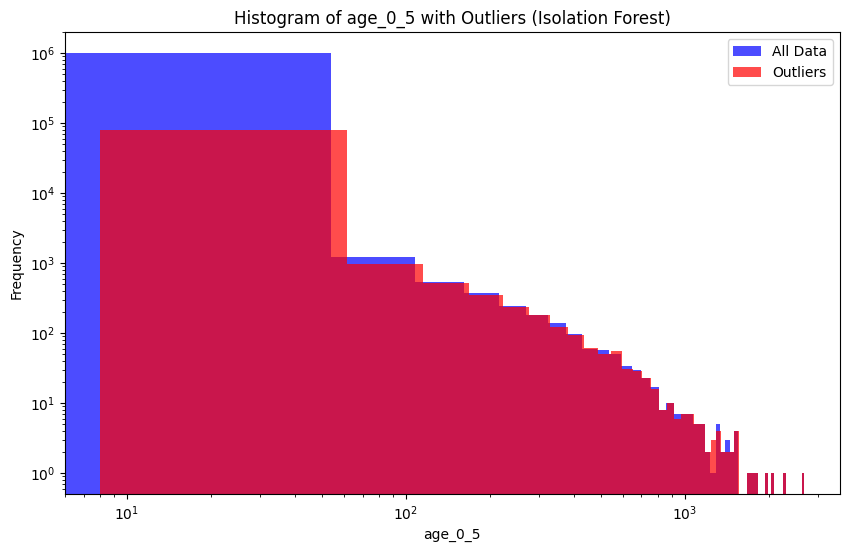

age_5_17: 92621 outliers detected using Isolation Forest


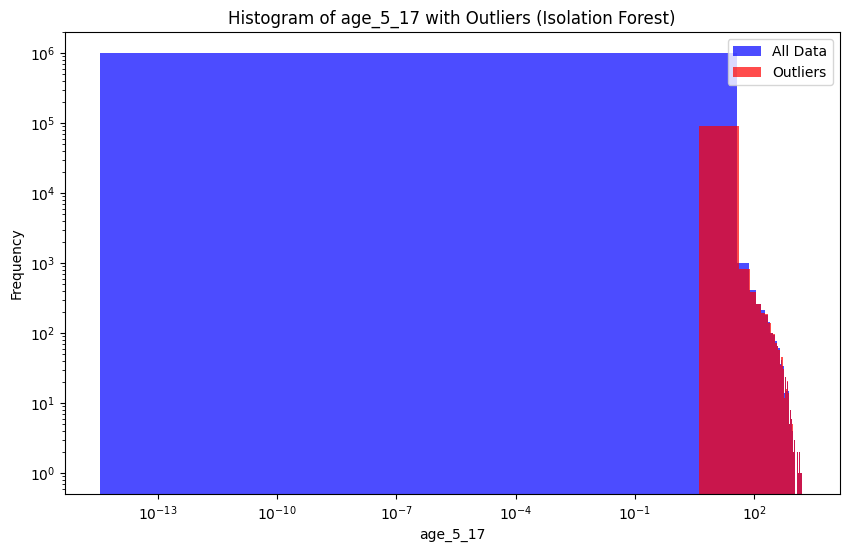

age_18_greater: 40225 outliers detected using Isolation Forest


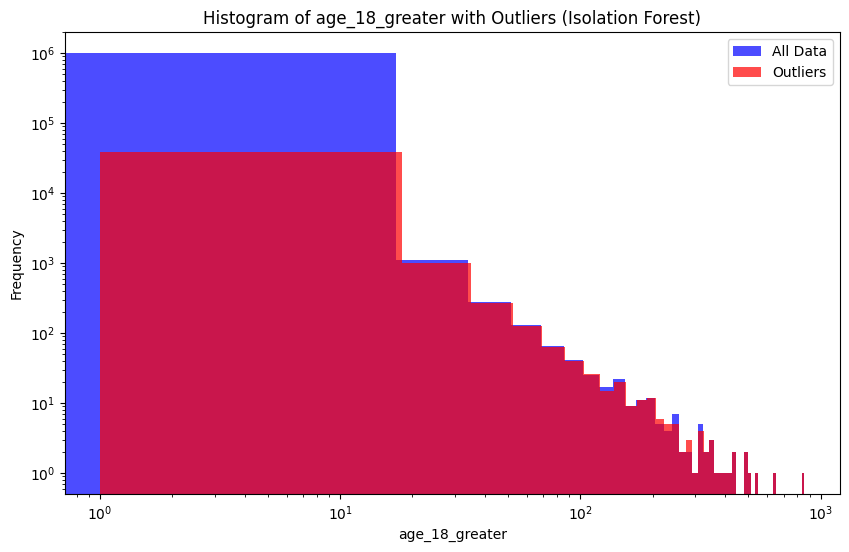

In [ ]:
# Outlier Detection using Isolation Forest

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load the data
df_iforest = pd.read_csv(r"D:\Hackthons\UIDAI\api_data_aadhar_enrolment\merged_final.csv")

# Define age group columns
age_groups = ['age_0_5', 'age_5_17', 'age_18_greater']

# Function to detect outliers using Isolation Forest
def detect_outliers_iforest(data, column, contamination=0.1):
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    preds = iso_forest.fit_predict(data[[column]])
    outliers = data[preds == -1]
    return outliers

# Detect and visualize outliers for each age group
for col in age_groups:
    if col in df_iforest.columns:
        outliers = detect_outliers_iforest(df_iforest, col)
        print(f"{col}: {len(outliers)} outliers detected using Isolation Forest")

        # Histogram for visualization
        plt.figure(figsize=(10, 6))
        plt.hist(df_iforest[col], bins=50, alpha=0.7, color='blue', label='All Data')
        plt.hist(outliers[col], bins=50, alpha=0.7, color='red', label='Outliers')
        plt.title(f'Histogram of {col} with Outliers (Isolation Forest)')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xscale('log')
        plt.yscale('log')
        plt.legend()
        plt.show()
    else:
        print(f"Column {col} not found in the data.")